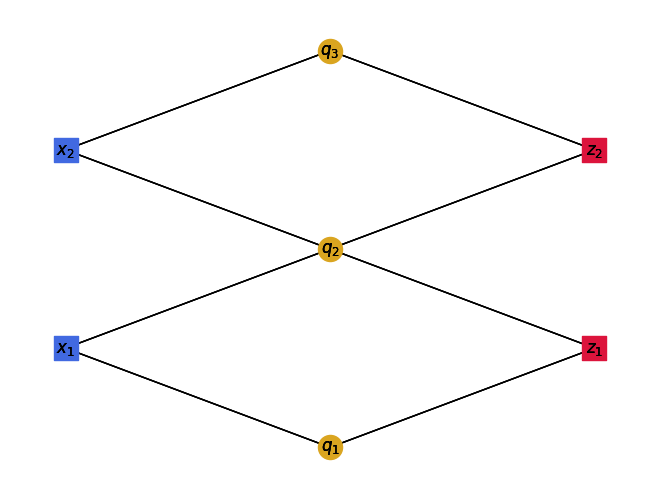

In [2]:
import numpy as np
import networkx as nx
import scipy.sparse as sp
import networkx.algorithms.bipartite as bpt
import matplotlib.pyplot as plt

from basic_css_code import construct_HGP_code

# H = np.array([
# [1, 1, 1, 0, 0, 0],
# [0, 1, 0, 1, 1, 0],
# [1, 0, 0, 1, 0, 1],
# [0, 0, 1, 0, 1, 1],
# ])
H = np.array([
    [1, 1, 0],
    [0, 1, 1]
])
Hx, Hz = construct_HGP_code(H)

G = bpt.from_biadjacency_matrix(sp.csr_array(H))

m, n = H.shape
sp.dok_array(H).keys()
x_labels = lambda c, v: (f'$x_{{{c+1}}}$', f'$q_{{{v+1}}}$')
z_labels = lambda c, v: (f'$z_{{{c+1}}}$', f'$q_{{{v+1}}}$')
x_edges = [x_labels(*e) for e in sp.dok_array(H).keys()]
z_edges = [z_labels(*e) for e in sp.dok_array(H).keys()]
Q = nx.Graph()
q_nodes = [f'$q_{{{v+1}}}$' for v in range(n)]
x_nodes = [f'$x_{{{c+1}}}$' for c in range(m)]
z_nodes = [f'$z_{{{c+1}}}$' for c in range(m)]
Q.add_nodes_from(x_nodes, layer=0)
Q.add_nodes_from(q_nodes, layer=1)
Q.add_nodes_from(z_nodes, layer=2)
Q.add_edges_from(x_edges)
Q.add_edges_from(z_edges)

pos = nx.multipartite_layout(Q, subset_key='layer')
for lbl, p in zip(q_nodes, np.sort([pos[lbl] for lbl in q_nodes], axis=0)):
    pos[lbl] = p
for lbl, p in zip(x_nodes, np.sort([pos[lbl] for lbl in x_nodes], axis=0)):
    pos[lbl] = p
for lbl, p in zip(z_nodes, np.sort([pos[lbl] for lbl in z_nodes], axis=0)):
    pos[lbl] = p

colors = ['darkblue', 'mediumorchid', 'red']

x_nodelist = [v for v, d in Q.nodes(data=True) if d['layer'] == 0]
q_nodelist = [v for v, d in Q.nodes(data=True) if d['layer'] == 1]
z_nodelist = [v for v, d in Q.nodes(data=True) if d['layer'] == 2]

nx.draw(Q, pos, nodelist=x_nodelist, node_color='#4169E1', node_shape='s', with_labels=True, label='X nodes')
nx.draw(Q, pos, nodelist=q_nodelist, node_color='#DAA520', node_shape='o', with_labels=True, label='Q nodes')
nx.draw(Q, pos, nodelist=z_nodelist, node_color='#DC143C', node_shape='s', with_labels=True, label='Z nodes')
plt.show()

Hx: 
[[1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 1]] 
Hz: 
[[1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1]]


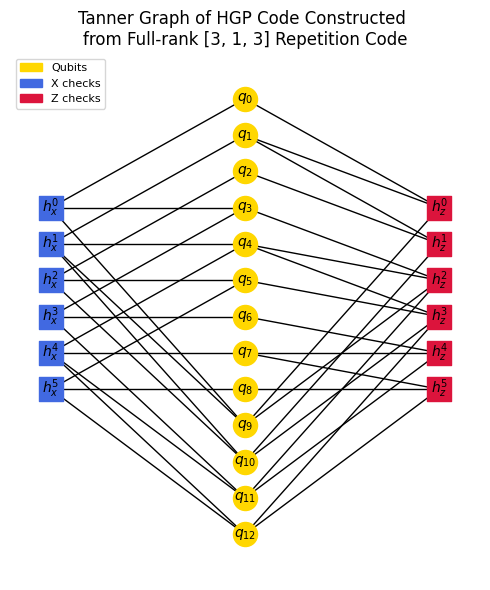

In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.sparse as sp

# Draw HGP Tanner graph correctly
def draw_hgp_tanner_graph(Hx, Hz):
    plt.figure(figsize=(5, 6))
    m_x, n = Hx.shape
    m_z, _ = Hz.shape

    print(f"Hx: \n{Hx.toarray()} \nHz: \n{Hz.toarray()}")

    G = nx.Graph()

    # Internal node names
    qubit_nodes = [f'q{i}' for i in range(n)]
    x_nodes = [f'hx{i}' for i in range(m_x)]
    z_nodes = [f'hz{i}' for i in range(m_z)]

    G.add_nodes_from(qubit_nodes, bipartite='qubit')
    G.add_nodes_from(x_nodes, bipartite='X')
    G.add_nodes_from(z_nodes, bipartite='Z')

    Hx = Hx.tocsr(copy=True)
    Hz = Hz.tocsr(copy=True)

    # Edges from Hx
    for i in range(m_x):
        for j in Hx[i].indices:
            if Hx[i, j] == 1:
                G.add_edge(f'hx{i}', f'q{j}')
            
            

    # Edges from Hz
    for i in range(m_z):
        for j in Hz[i].indices:
            if Hz[i, j] == 1:
                G.add_edge(f'hz{i}', f'q{j}')

    # Manual layout
    pos = {}
    spacing = 0.5
    for i, node in enumerate(x_nodes):
        pos[node] = [-1, -1.5 -i * spacing]
    for i, node in enumerate(qubit_nodes):
        pos[node] = [0, -i * spacing]
    for i, node in enumerate(z_nodes):
        pos[node] = [1, -1.5 -i * spacing]

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=qubit_nodes, node_color='gold', node_shape='o')
    nx.draw_networkx_nodes(G, pos, nodelist=x_nodes, node_color='royalblue', node_shape='s')
    nx.draw_networkx_nodes(G, pos, nodelist=z_nodes, node_color='crimson', node_shape='s')

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw labels (with LaTeX-style display)
    labels = {}
    for node in qubit_nodes:
        i = int(node[1:])
        labels[node] = f'$q_{{{i}}}$'
    for node in x_nodes:
        i = int(node[2:])
        labels[node] = f'$h_x^{{{i}}}$'
    for node in z_nodes:
        i = int(node[2:])
        labels[node] = f'$h_z^{{{i}}}$'

    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Legend
    legend_elements = [
        mpatches.Patch(color='gold', label='Qubits'),
        mpatches.Patch(color='royalblue', label='X checks'),
        mpatches.Patch(color='crimson', label='Z checks')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1), fontsize=8)

    plt.title("Tanner Graph of HGP Code Constructed \nfrom Full-rank [3, 1, 3] Repetition Code")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_hgp_tanner_graph(Hx, Hz)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_tanner_graph(G: nx.MultiGraph, title="Tanner Graph Visualization"):
    """
    Draws a Tanner graph with a bipartite layout.
    
    Args:
        G: A networkx MultiGraph or Graph. Nodes must have a 'bipartite' attribute 
           (0 for bottom/variable nodes, 1 for top/check nodes).
        title: Title of the plot.
    """
    # --- 1. Separate and Sort Nodes ---
    # Filter nodes for Top Row (Check Nodes, bipartite=1)
    top_nodes = [n for n, d in G.nodes(data=True) if d.get('bipartite') == 1]
    # Filter nodes for Bottom Row (Variable Nodes, bipartite=0)
    bottom_nodes = [n for n, d in G.nodes(
        data=True) if d.get('bipartite') == 0]

    # Sort to ensure deterministic ordering (S0, S1... vs C0, C1...)
    top_nodes.sort()
    bottom_nodes.sort()

    # --- 2. Define Custom Positions ---
    pos = {}

    # Position Top Nodes at y=1
    for i, node in enumerate(top_nodes):
        pos[node] = (i, 1)

    # Position Bottom Nodes at y=0
    # Scale x-coordinates so the bottom row width matches the top row
    if len(bottom_nodes) > 1:
        width_scale = (len(top_nodes) - 1) / (len(bottom_nodes) - 1)
    else:
        width_scale = 1

    for i, node in enumerate(bottom_nodes):
        pos[node] = (i * width_scale, 0)

    # --- 3. Generate Labels ---
    labels = {}
    for i, node in enumerate(top_nodes):
        labels[node] = f"S{i}"
    for i, node in enumerate(bottom_nodes):
        labels[node] = f"C{i}"

    # --- 4. Plotting ---
    plt.figure(figsize=(12, 8))

    # Draw Edges
    # For MultiGraphs, this draws all edges. If you have parallel edges,
    # they will overlap unless you use a connectionstyle (e.g., arc3).
    nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.5, connectionstyle='arc3, rad=0.1')
    # nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.5)

    # Draw Top Nodes (Checks)
    nx.draw_networkx_nodes(G, pos,
                           nodelist=top_nodes,
                           node_color='skyblue',
                           node_size=1000)

    # Draw Bottom Nodes (Variables)
    nx.draw_networkx_nodes(G, pos,
                           nodelist=bottom_nodes,
                           node_color='lightcoral',
                           node_size=1000)

    # Draw Labels
    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Best Code from Best Neighbor Search

Best state edge list: [[ 0 20  0 20  0 24  0 30  1 15  1 21  1 25  1 31  2 15  2 22  2 26  2 28
   2 34  3 15  3 16  3 26  3 31  4 16  4 22  4 25  4 30  5 16  5 23  5 28
   5 32  6 17  6 20  6 27  6 33  7 17  7 22  7 27  7 31  8 17  8 21  8 23
   8 30  9 21  9 28  9 32  9 33 10 18 10 18 10 23 10 26 11 18 11 24 11 29
  11 34 12 19 12 27 12 29 12 34 13 19 13 24 13 32 13 33 14 19 14 25 14 29]]


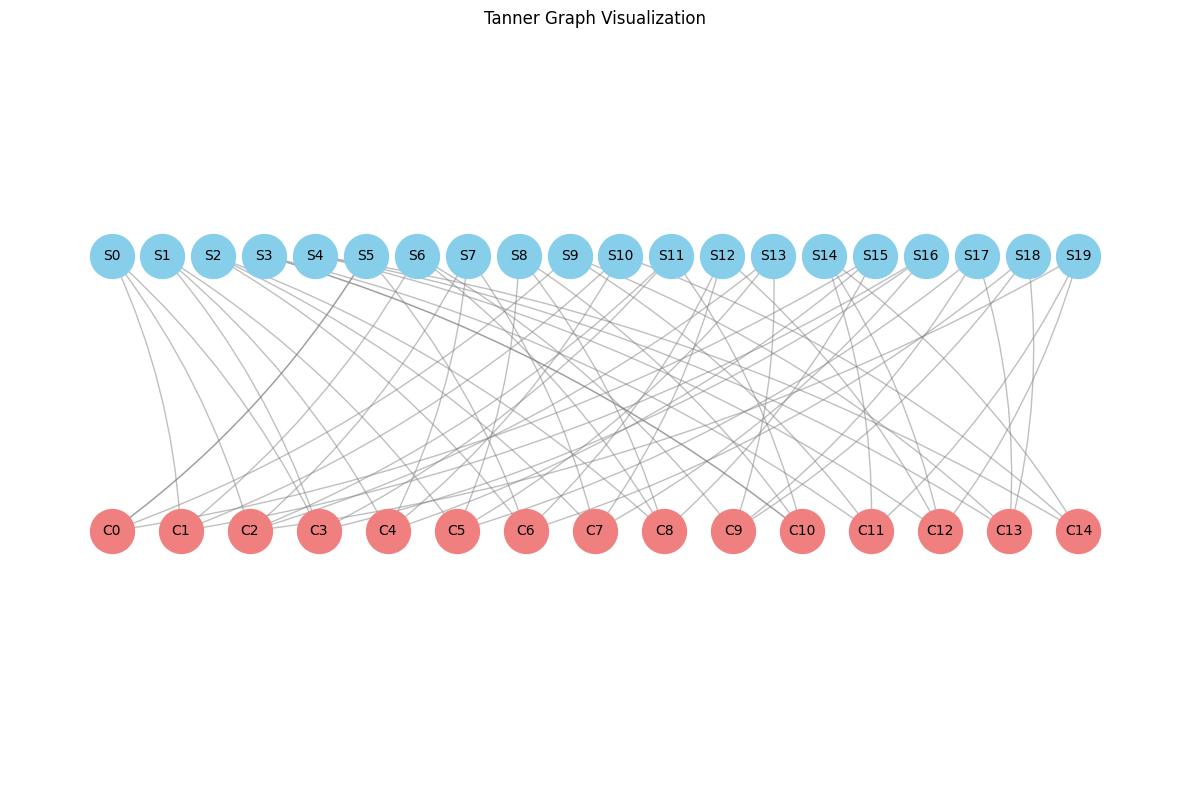

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import h5py

from optimization.analyze_codes.decoder_performance_from_state import evaluate_performance_of_state
from optimization.experiments_settings import from_edgelist

filepath = "optimization/results/best_neighbor_search_early_stop.hdf5"
code_name = "[625,25]"  # Update this key if needed
MC_budget = int(1e5)
p = 0.03

with h5py.File(filepath, "r") as f:
    grp = f[code_name]

    # Load datasets
    best_state_edge_list = grp["best_state"][:]
    best_state = from_edgelist(best_state_edge_list)

    print(f"Best state edge list: {best_state_edge_list}")

    # cost_result = evaluate_performance_of_state(
    #     state=best_state, p_vals=[p], MC_budget=MC_budget, canskip=False)

draw_tanner_graph(best_state)

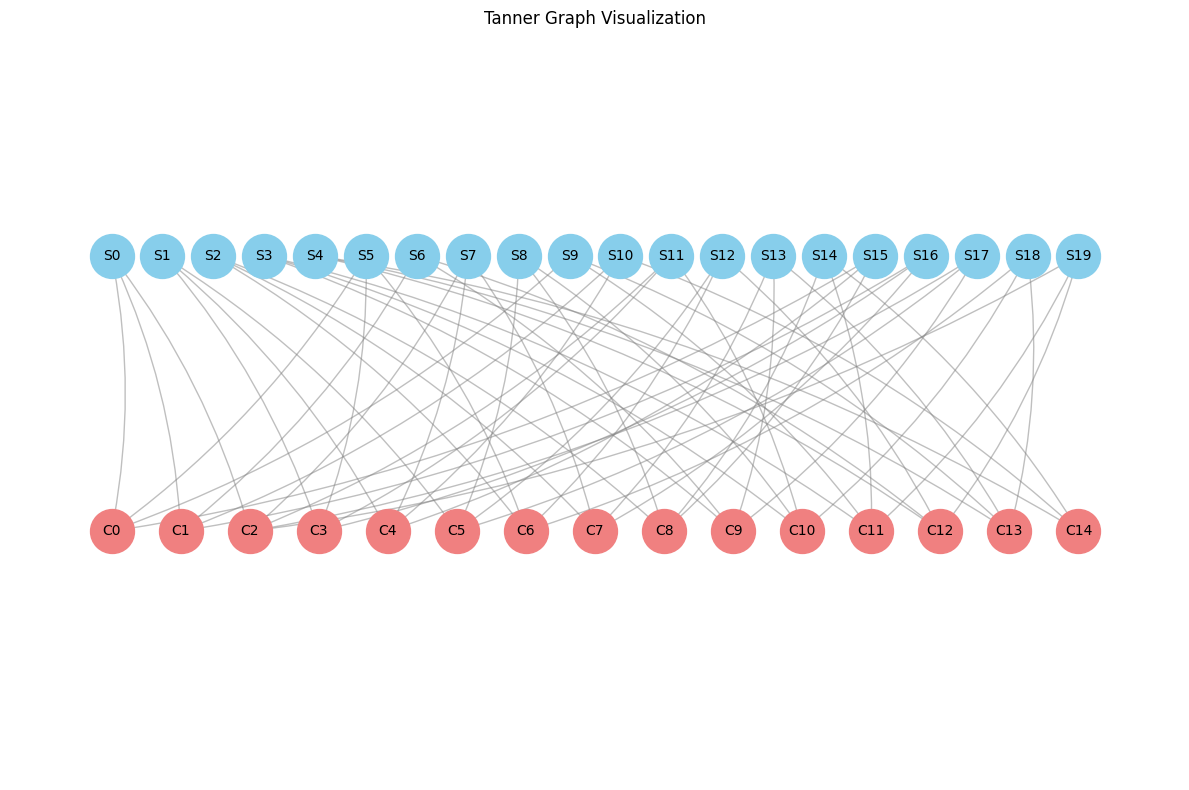

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import h5py

from optimization.analyze_codes.decoder_performance_from_state import evaluate_performance_of_state
from optimization.experiments_settings import from_edgelist, load_tanner_graph

path_to_initial_codes = 'optimization/initial_codes/'
codes = ['[625,25]', '[1225,65]', '[1600,64]', '[2025,81]']
textfiles = [f"HGP_(3,4)_{code}.txt" for code in codes]

C = 0

initial_state = load_tanner_graph(path_to_initial_codes + textfiles[C])
draw_tanner_graph(initial_state)

In [ ]:
from optimization.analyze_codes.draw_tanner_graph import draw_interactive_tanner_graph

import networkx as nx
import matplotlib.pyplot as plt
import h5py

from optimization.analyze_codes.decoder_performance_from_state import evaluate_performance_of_state
from optimization.experiments_settings import from_edgelist

filepath = "optimization/results/beam_search_L15_old_parents_included_1e5_run1.hdf5"
code_name = "[625,25]"  # Update this key if needed
MC_budget = int(1e5)
p = 0.03

with h5py.File(filepath, "r") as f:
    grp = f[code_name]

    # Load datasets
    best_state_edge_list = grp["best_state"][:]
    best_state = from_edgelist(best_state_edge_list)

    print(f"Best state edge list: {best_state_edge_list}")

    # cost_result = evaluate_performance_of_state(
    #     state=best_state, p_vals=[p], MC_budget=MC_budget, canskip=False)

# --- Run it ---
draw_interactive_tanner_graph(
    best_state, filename='beam_search_L15_old_parents_included_1e5_run1_C0')

Best state edge list: [[ 0 20  0 25  0 28  0 30  1 15  1 21  1 21  1 31  2 15  2 22  2 26  2 32
   2 34  3 16  3 20  3 27  3 31  4 16  4 22  4 25  4 30  5 16  5 23  5 27
   5 32  6 17  6 20  6 27  6 33  7 17  7 22  7 29  7 33  8 17  8 30  8 31
   8 34  9 18  9 21  9 28  9 32 10 18 10 23 10 26 10 33 11 18 11 24 11 29
  11 34 12 15 12 19 12 23 12 26 13 19 13 24 13 24 13 28 14 19 14 25 14 29]]
Graph saved to tanner_graph.html. Open this file in your browser.


In [6]:
from optimization.analyze_codes.draw_tanner_graph import draw_interactive_tanner_graph

import networkx as nx
import matplotlib.pyplot as plt
import h5py

from optimization.analyze_codes.decoder_performance_from_state import evaluate_performance_of_state
from optimization.experiments_settings import from_edgelist

filepath = "optimization/results/beam_search_L15_old_parents_included_1e5_run1.hdf5"
code_name = "[625,25]"  # Update this key if needed
MC_budget = int(1e5)
p = 0.03

with h5py.File(filepath, "r") as f:
    grp = f[code_name]

    # Load datasets
    best_state_edge_list = grp["best_state"][:]
    best_state = from_edgelist(best_state_edge_list)

    print(f"Best state edge list: {best_state_edge_list}")

for i in range(5):
  cost_result = evaluate_performance_of_state(
       state=best_state, p_vals=[p], MC_budget=MC_budget, canskip=False)

Best state edge list: [[ 0 20  0 25  0 28  0 30  1 15  1 21  1 21  1 31  2 15  2 22  2 26  2 32
   2 34  3 16  3 20  3 27  3 31  4 16  4 22  4 25  4 30  5 16  5 23  5 27
   5 32  6 17  6 20  6 27  6 33  7 17  7 22  7 29  7 33  8 17  8 30  8 31
   8 34  9 18  9 21  9 28  9 32 10 18 10 23 10 26 10 33 11 18 11 24 11 29
  11 34 12 15 12 19 12 23 12 26 13 19 13 24 13 24 13 28 14 19 14 25 14 29]]
H: [20, 5, 8]
H^T: [15, 0, inf]
Q: [[625, 25, 8]]
Hx, Hz, Lx, Lz: (300, 625), (300, 625), (25, 625), (25, 625)
BP max iterations: 62, OSD order: 2, MS scaling factor: 0.625


/Users/manyyeon/data/git/optimizing-qLDPC-code/.venv/lib/python3.12/site-packages/ldpc/code_util/code_util.py:164: UserWarning: This function has exponential complexity. Not recommended for large pcms. Use the                            'ldpc.code_util.estimate_code_distance' function instead.
  warnings.warn(


Decoder Best neighbor search finished in 1.0m 15.43s with 322 failures out of 100000 runs.
Logical error rate for Best neighbor search: 0.00322 ± 0.0001792 (stderr)
H: [20, 5, 8]
H^T: [15, 0, inf]
Q: [[625, 25, 8]]
Hx, Hz, Lx, Lz: (300, 625), (300, 625), (25, 625), (25, 625)
BP max iterations: 62, OSD order: 2, MS scaling factor: 0.625
Decoder Best neighbor search finished in 1.0m 16.14s with 362 failures out of 100000 runs.
Logical error rate for Best neighbor search: 0.00362 ± 0.0001899 (stderr)
H: [20, 5, 8]
H^T: [15, 0, inf]
Q: [[625, 25, 8]]
Hx, Hz, Lx, Lz: (300, 625), (300, 625), (25, 625), (25, 625)
BP max iterations: 62, OSD order: 2, MS scaling factor: 0.625
Decoder Best neighbor search finished in 1.0m 17.58s with 385 failures out of 100000 runs.
Logical error rate for Best neighbor search: 0.00385 ± 0.0001958 (stderr)
H: [20, 5, 8]
H^T: [15, 0, inf]
Q: [[625, 25, 8]]
Hx, Hz, Lx, Lz: (300, 625), (300, 625), (25, 625), (25, 625)
BP max iterations: 62, OSD order: 2, MS scaling 

In [7]:
from optimization.analyze_codes.draw_tanner_graph import draw_interactive_tanner_graph

import networkx as nx
import matplotlib.pyplot as plt
import h5py

from optimization.analyze_codes.decoder_performance_from_state import evaluate_performance_of_state
from optimization.experiments_settings import from_edgelist

filepath = "optimization/results/beam_search_L15_old_parents_included_1e5_run1.hdf5"
code_name = "[625,25]"  # Update this key if needed
MC_budget = int(1e5)
p = 0.03

with h5py.File(filepath, "r") as f:
    grp = f[code_name]

    # Load datasets
    best_state_edge_list = grp["best_state"][:]
    best_state = from_edgelist(best_state_edge_list)

    print(f"Best state edge list: {best_state_edge_list}")

for i in range(5):
  cost_result = evaluate_performance_of_state(
      state=best_state, p_vals=[p], MC_budget=MC_budget, canskip=False)

Best state edge list: [[ 0 20  0 25  0 28  0 30  1 15  1 21  1 21  1 31  2 15  2 22  2 26  2 32
   2 34  3 16  3 20  3 27  3 31  4 16  4 22  4 25  4 30  5 16  5 23  5 27
   5 32  6 17  6 20  6 27  6 33  7 17  7 22  7 29  7 33  8 17  8 30  8 31
   8 34  9 18  9 21  9 28  9 32 10 18 10 23 10 26 10 33 11 18 11 24 11 29
  11 34 12 15 12 19 12 23 12 26 13 19 13 24 13 24 13 28 14 19 14 25 14 29]]
H: [20, 5, 8]
H^T: [15, 0, inf]
Q: [[625, 25, 8]]
Hx, Hz, Lx, Lz: (300, 625), (300, 625), (25, 625), (25, 625)
BP max iterations: 62, OSD order: 2, MS scaling factor: 0.625
Decoder Best neighbor search finished in 1.0m 14.74s with 322 failures out of 100000 runs.
Logical error rate for Best neighbor search: 0.00322 ± 0.0001792 (stderr)
H: [20, 5, 8]
H^T: [15, 0, inf]
Q: [[625, 25, 8]]
Hx, Hz, Lx, Lz: (300, 625), (300, 625), (25, 625), (25, 625)
BP max iterations: 62, OSD order: 2, MS scaling factor: 0.625
Decoder Best neighbor search finished in 1.0m 14.82s with 370 failures out of 100000 runs.
Logi

In [8]:
from optimization.analyze_codes.draw_tanner_graph import draw_interactive_tanner_graph

import networkx as nx
import matplotlib.pyplot as plt
import h5py

from optimization.analyze_codes.decoder_performance_from_state import evaluate_performance_of_state
from optimization.experiments_settings import from_edgelist

filepath = "optimization/results/beam_search_L15_old_parents_included_1e5_run1.hdf5"
code_name = "[625,25]"  # Update this key if needed
MC_budget = int(1e6)
p = 0.03

with h5py.File(filepath, "r") as f:
    grp = f[code_name]

    # Load datasets
    best_state_edge_list = grp["best_state"][:]
    best_state = from_edgelist(best_state_edge_list)

    print(f"Best state edge list: {best_state_edge_list}")

for i in range(5):
  cost_result = evaluate_performance_of_state(
      state=best_state, p_vals=[p], MC_budget=MC_budget, canskip=False)

Best state edge list: [[ 0 20  0 25  0 28  0 30  1 15  1 21  1 21  1 31  2 15  2 22  2 26  2 32
   2 34  3 16  3 20  3 27  3 31  4 16  4 22  4 25  4 30  5 16  5 23  5 27
   5 32  6 17  6 20  6 27  6 33  7 17  7 22  7 29  7 33  8 17  8 30  8 31
   8 34  9 18  9 21  9 28  9 32 10 18 10 23 10 26 10 33 11 18 11 24 11 29
  11 34 12 15 12 19 12 23 12 26 13 19 13 24 13 24 13 28 14 19 14 25 14 29]]
H: [20, 5, 8]
H^T: [15, 0, inf]
Q: [[625, 25, 8]]
Hx, Hz, Lx, Lz: (300, 625), (300, 625), (25, 625), (25, 625)
BP max iterations: 62, OSD order: 2, MS scaling factor: 0.625
Decoder Best neighbor search finished in 9.0m 44.22s with 3486 failures out of 1000000 runs.
Logical error rate for Best neighbor search: 0.003486 ± 0.0000589 (stderr)
H: [20, 5, 8]
H^T: [15, 0, inf]
Q: [[625, 25, 8]]
Hx, Hz, Lx, Lz: (300, 625), (300, 625), (25, 625), (25, 625)
BP max iterations: 62, OSD order: 2, MS scaling factor: 0.625
Decoder Best neighbor search finished in 9.0m 34.33s with 3522 failures out of 1000000 runs.

In [ ]:
from optimization.analyze_codes.draw_tanner_graph import draw_interactive_tanner_graph

import networkx as nx
import matplotlib.pyplot as plt
import h5py

from optimization.analyze_codes.decoder_performance_from_state import evaluate_performance_of_state
from optimization.experiments_settings import from_edgelist

filepath = "optimization/results/best_neighbor_search_early_stop.hdf5"
code_name = "[625,25]"  # Update this key if needed
MC_budget = int(1e6)
p = 0.03

with h5py.File(filepath, "r") as f:
    grp = f[code_name]

    # Load datasets
    best_state_edge_list = grp["best_state"][:]
    best_state = from_edgelist(best_state_edge_list)

    print(f"Best state edge list: {best_state_edge_list}")

cost_result = evaluate_performance_of_state(
      state=best_state, p_vals=[p], MC_budget=MC_budget, canskip=False)